# Introduction Regression

Regresi merupakan alat yang digunakan untuk memprediksi suatu nilai dan mengetahui fitur yang berpengaruh secara signifikan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston = pd.read_csv('boston.csv')

In [5]:
boston.head()

CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [6]:
X = boston.drop('MEDV', axis=1)

In [7]:
y = boston['MEDV'].values

In [8]:
X_rooms = X['RM'].values

Text(0.5, 0, 'Number of rooms')

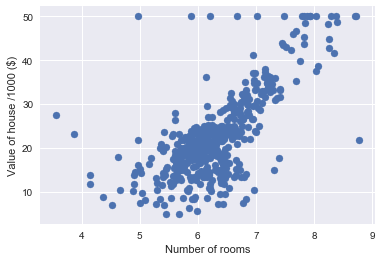

In [10]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')

In [11]:
X_rooms = X_rooms.reshape(-1, 1)
y = y.reshape(-1, 1)

In [12]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

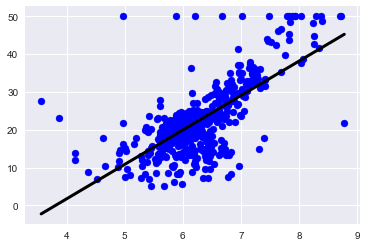

In [14]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
         color='black', linewidth=3)


# Dasar Regresi Linear

$y = b_0 + b_1x$

$y$ = target

$x$ = satu fitur

$b_0, b_1$ = parameter dari model

Bagiamana memilih $b_0$ dan $b_1$

Mencari fungsi error di setiap garis
    - Kemudian meminimalkan error

# Loss Function

<img src="loss-function.png" alt="Drawing" width="800" height="800" />

# Regresi Linear Dimensi Tinggi

## $ y = b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n   $    

In [15]:
X = X.values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484953

# Cross Validation

- Performa model tergantung dari data yang split
- Model idak mampun mengeneralisasi data
- Solusi Cross Validation


<img src="cv.png" alt="Drawing" width="800" height="800" />

- 5 folds = 5 folds CV
- 10 folds = 5 folds CV
- k folds = k folds CV

In [17]:
from sklearn.model_selection import cross_val_score
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [18]:
np.mean(cv_results)

0.3532759243958813

# Tools lain untuk mengetahui fitur yang berpengaruh signifikan

In [22]:
import seaborn as sns 
from statsmodels.tools.tools import add_constant 
from statsmodels.regression.linear_model import OLS 
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white 
from scipy.stats import kstest, shapiro

In [64]:
boston = pd.read_csv('boston.csv')

In [24]:
boston.head()

CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [65]:
X = boston.drop('MEDV', axis=1)

In [66]:
y = boston['MEDV'].values

In [67]:
X=add_constant(X)

In [68]:
X.head()

const     CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0    1.0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    1.0  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    1.0  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    1.0  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    1.0  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state=42)

In [30]:
model_nprod = OLS(y_train, X_train)
result_nprod = model_nprod.fit() 
print(result_nprod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           4.96e-92
Time:                        22:01:12   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

In [31]:
print(result_nprod.predict(X_test))

173    28.648960
274    36.495014
491    15.411193
72     25.403213
452    18.855280
76     23.146689
316    17.392124
140    14.078599
471    23.036927
500    20.599433
218    24.822862
9      18.530570
414    -6.865435
78     21.801723
323    19.225712
473    26.191920
124    20.277339
388     5.615964
195    40.448880
448    17.576959
271    27.443191
278    30.171596
30     10.940558
501    24.020831
421    18.076938
474    15.934748
79     23.126140
454    14.560521
210    22.334825
497    19.325763
         ...    
418     3.379371
117    23.904658
42     25.817921
322    23.110205
347    25.334892
182    33.355452
155    20.607245
280    38.477267
126    13.973985
329    25.219240
31     17.809466
113    20.634374
148     9.802674
432    21.079536
338    22.337842
57     32.323819
194    31.486949
24     15.466213
17     16.862428
298    28.993305
66     24.954679
211    16.736336
404     6.128584
94     26.659900
154    23.340072
441    17.403672
23     13.385941
225    39.9834

In [32]:
Rsquared=1-sum((y_test-result_nprod.predict(X_test))**2)/sum((y_test-y_test.mean())**2)
Rsquared

0.7112260057484914

# Asumsi Independen

In [11]:
residual=result_nprod.resid
chisq_stat, chisq_pval = acorr_ljungbox(residual) 
print('statistik uji chi-square =', ['{0:.3f}'.format(val) for val in chisq_stat]) 
print('p-value =', ['{0:.3f}'.format(val) for val in chisq_pval])

statistik uji chi-square = ['0.694', '2.227', '2.228', '3.575', '3.588', '4.210', '5.691', '8.523', '8.798', '9.178', '9.219', '10.769', '12.011', '14.231', '14.488', '14.549', '14.594', '14.720', '17.077', '17.081', '17.572', '18.840', '21.080', '21.534', '21.787', '22.369', '22.522', '23.969', '25.773', '25.812', '27.544', '28.599', '28.973', '29.957', '29.962', '30.919', '30.930', '30.945', '30.997', '37.841']
p-value = ['0.405', '0.328', '0.527', '0.467', '0.610', '0.648', '0.576', '0.384', '0.456', '0.515', '0.602', '0.549', '0.527', '0.433', '0.489', '0.558', '0.625', '0.681', '0.585', '0.648', '0.676', '0.655', '0.576', '0.607', '0.648', '0.668', '0.710', '0.683', '0.638', '0.685', '0.645', '0.639', '0.668', '0.666', '0.710', '0.709', '0.748', '0.785', '0.816', '0.568']


hasil pengujian menunjukkan bahwa residual memenuhi asumsi independen dengan pvalue>0.05

# Asumsi Identik

In [12]:
het_result = het_white(residual, X_train) 
print('LM stat = {0:.3f}'.format(het_result[0])) 
print('LM p-value = {0:.3f}'.format(het_result[1])) 
print('F stat = {0:.3f}'.format(het_result[2])) 
print('F p-value = {0:.3f}'.format(het_result[3])) 

LM stat = 276.881
LM p-value = 0.000
F stat = 8.714
F p-value = 0.000


hasil pengujian menunjukkan bahwa residual tidak memenuhi asumsi identik dengan pvalue<0.05

# Asumsi Distribusi Normal

In [13]:
kstest(residual, 'norm') 

KstestResult(statistic=0.3510984483181271, pvalue=1.6025067604360635e-39)

In [14]:
shapiro(residual)

(0.9067447781562805, 5.849965287576045e-14)